# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `YusufMesbah.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it.
- If the instructions seem vague, use common sense.

# Task 1: ANN (30%)
For this task, you are required to build a fully connect feed-forward ANN model
for a multi-label regression problem.

For the given data, you need do proper data preprocessing, design the ANN model,
then fine-tune your model architecture (number of layers, number of neurons,
activation function, learning rate, momentum, regularization).

For evaluating your model, do $80/20$ train test split.

### Data
You will be working with the data in `Task 1.csv` for predicting students'
scores in 3 different exams: math, reading and writing. The columns include:
 - gender
 - race
 - parental level of education
 - lunch meal plan at school
 - whether the student undertook the test preparation course

# Task 1

## Preprocessing

In [1]:
# importing pandas and reading csv
import pandas as pd
df = pd.read_csv("/content/Task 1.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### There are 5 non numerical columns, finding their unqiue counts to decide encoding

In [2]:
print(f"Gender: {df['gender'].value_counts()}")
print(f"\nEthnicity: {df['race/ethnicity'].value_counts()}")
print(f"\nParental education: {df['parental level of education'].value_counts()}")
print(f"\nLunch: {df['lunch'].value_counts()}")
print(f"\nTest preparation: {df['test preparation course'].value_counts()}")

Gender: male      517
female    483
Name: gender, dtype: int64

Ethnicity: group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

Parental education: some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

Lunch: standard        652
free/reduced    348
Name: lunch, dtype: int64

Test preparation: none         665
completed    335
Name: test preparation course, dtype: int64


### It can be seen that these data are categorical, hence, oridnal encoding can be used to encode them

In [3]:
from sklearn.preprocessing import OrdinalEncoder
to_be_encoded =  df[['gender','race/ethnicity','parental level of education',
                     'lunch','test preparation course']]

# Save the encoded data to the original
df[['gender', 'race/ethnicity','parental level of education',
    'lunch','test preparation course']] = OrdinalEncoder().fit_transform(to_be_encoded)                    

### Checking the encoded data

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,0.0,2.0,1.0,0.0,67,67,63
1,0.0,3.0,5.0,0.0,1.0,40,59,55
2,1.0,4.0,4.0,0.0,1.0,59,60,50
3,1.0,1.0,2.0,1.0,1.0,77,78,68
4,1.0,4.0,0.0,1.0,0.0,78,73,68


### Saving target columns in `y`, and droping from df

In [5]:
y = df[['math score', 'reading score', 'writing score']]
df = df.drop(['math score', 'reading score', 'writing score'], axis = 1)

### Check df after target removal

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,1.0,0.0,2.0,1.0,0.0
1,0.0,3.0,5.0,0.0,1.0
2,1.0,4.0,4.0,0.0,1.0
3,1.0,1.0,2.0,1.0,1.0
4,1.0,4.0,0.0,1.0,0.0


### Check the y we got (target)

In [7]:
y.head()

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68


### Checking for `Correlation`

In [8]:
df.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
gender,1.000000,0.063231,-0.078676,-0.033962,-0.007653
race/ethnicity,0.063231,1.000000,-0.011034,-0.033335,0.029828
parental level of education,-0.078676,-0.011034,1.000000,-0.033616,0.008912
lunch,-0.033962,-0.033335,-0.033616,1.000000,-0.029267
test preparation course,-0.007653,0.029828,0.008912,-0.029267,1.000000


### There aren't any highly correlated columns, so lets as it is

In [9]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

### Train test split
80/20 Train-Test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

### Checking train test shape

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800, 3), (200, 3))

# Training (ANN)
## TensorFlow Keras (Functional API)

In [12]:
from tensorflow.python.ops.logging_ops import random
import tensorflow as tf

def build_model():# random seed to reproduce results
  tf.random.set_seed(42)
  
  # Functional API
  
  # Input layer
  input = tf.keras.Input(shape=(5,))
  
  flatten = tf.keras.layers.Flatten()
  dense1 = tf.keras.layers.Dense(64)
  dense2 = tf.keras.layers.Dense(64)
  
  output = tf.keras.layers.Dense(3)
  
  x = flatten(input)
  x = dense1(x)
  x = dense2(x)
  outputs = output(x)
  
  # model
  model = tf.keras.Model(inputs = input, outputs = outputs, name = "Task1")
  return model

### Compiling, fitting, and predicting 

In [13]:
# Compiling
model = build_model()
model.compile(loss=tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(momentum=0.01),
              metrics = ["MAE"])

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fitting
history = model.fit(X_train, y_train, callbacks = [lr_scheduler], epochs = 100)

# Predicting
y_pred = model.predict(X_test)

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 67.6358 - MAE: 67.6358 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 67.6304 - MAE: 67.6304 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 67.6244 - MAE: 67.6244 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 67.6175 - MAE: 67.6175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 67.6099 - MAE: 67.6099 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 67.6013 - MAE: 67.6013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 67.5917 - MAE: 67.5917 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 67.5809 - MAE: 67.5809 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 67.5687 - MAE: 67.5687 

### Evaluating the model

In [14]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: nan - MAE: nan


[nan, nan]

Text(0.5, 0, 'epochs')

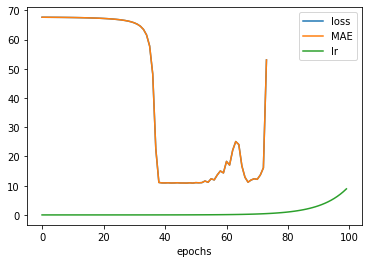

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel("epochs")

Text(0, 0.5, 'loss')

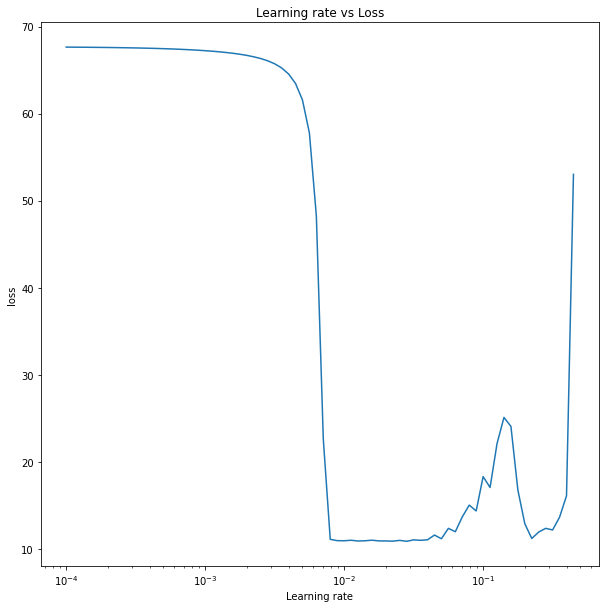

In [16]:
# lets only plot between learning rate vs loss
lr = 1e-4 * (10 ** (tf.range(100)/20)) # these would be our range of lrs in callbacks
lr
# Now lets plot
plt.figure(figsize = (10,10))
plt.semilogx(lr, history.history["loss"]) # Semilogx will put log scaling on x axis
# history["loss"] will give us only loss from history
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("loss")

In [17]:
# Compiling
model = build_model()
model.compile(loss=tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(momentum=0.01, learning_rate = 0.01),
              metrics = ["MAE"])

# Fitting
history = model.fit(X_train, y_train, epochs = 100)

# Predicting
y_pred = model.predict(X_test)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 67.3903 - MAE: 67.3903
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 66.7992 - MAE: 66.7992
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 65.9306 - MAE: 65.9306
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 64.3015 - MAE: 64.3015
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 60.3079 - MAE: 60.3079
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 45.7938 - MAE: 45.7938
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 14.1352 - MAE: 14.1352
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 11.0138 - MAE: 11.0138
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9251 - MAE: 10.9251
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 10.9525 - MAE: 10.9525
Epoch 11/100
25/25 [===================

In [18]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 10.8886 - MAE: 10.8886


[10.888611793518066, 10.888611793518066]

In [19]:
from tensorflow.python.ops.logging_ops import random
import tensorflow as tf

model2 = build_model()

# Compiling
model2.compile(loss=tf.keras.losses.MAE,
              optimizer = "Adam",
              metrics = ["MAE"])

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fitting
history = model2.fit(X_train, y_train, callbacks = [lr_scheduler], epochs = 100)

# Predicting
y_pred = model2.predict(X_test)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 67.6237 - MAE: 67.6237 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 67.5887 - MAE: 67.5887 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 67.5486 - MAE: 67.5486 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 67.5025 - MAE: 67.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 67.4450 - MAE: 67.4450 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 67.3703 - MAE: 67.3703 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 67.2707 - MAE: 67.2707 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 67.1236 - MAE: 67.1236 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 66.8984 - MAE: 66.8984 

In [20]:
model2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 2720.7021 - MAE: 2720.7021


[2720.7021484375, 2720.7021484375]

Text(0.5, 0, 'epochs')

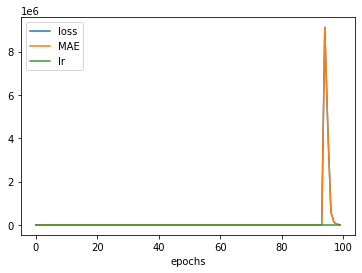

In [21]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")

Text(0, 0.5, 'loss')

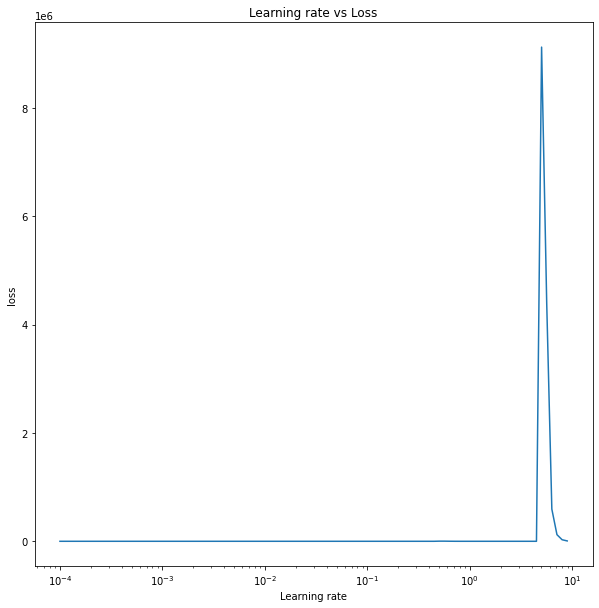

In [22]:
# lets only plot between learning rate vs loss
lr = 1e-4 * (10 ** (tf.range(100)/20)) # these would be our range of lrs in callbacks
lr
# Now lets plot
plt.figure(figsize = (10,10))
plt.semilogx(lr, history.history["loss"]) # Semilogx will put log scaling on x axis
# history["loss"] will give us only loss from history
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("loss")

In [23]:
from tensorflow.python.ops.logging_ops import random
import tensorflow as tf

model3 = build_model()
# Compiling
model3.compile(loss=tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["MAE"])

# Fitting
history = model3.fit(X_train, y_train, epochs = 100)

# Predicting
y_pred = model3.predict(X_test)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 67.4820 - MAE: 67.4820
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 66.9338 - MAE: 66.9338
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 65.4376 - MAE: 65.4376
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 61.2285 - MAE: 61.2285
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 51.0792 - MAE: 51.0792
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 32.3476 - MAE: 32.3476
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 13.8699 - MAE: 13.8699
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 11.1266 - MAE: 11.1266
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 10.8616 - MAE: 10.8616
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 10.8701 - MAE: 10.8701
Epoch 11/100
25/25 [===================

In [24]:
model3.evaluate(X_test, y_test), model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 10.8886 - MAE: 10.8886


([10.935420036315918, 10.935420036315918],
 [10.888611793518066, 10.888611793518066])

### Thus model with SGD() as optimizer is a little better

In [25]:
# Compiling
model = build_model()
model.compile(loss=tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(momentum=0.01, learning_rate = 0.01),
              metrics = ["MAE"])

# Fitting
history = model.fit(X_train, y_train, epochs = 100, verbose = 0)

# Predicting
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [26]:
y_pred.shape

(200, 3)

### Plotting the results

In [27]:
# The function to (scatter) plot prediction
def plot_pred(y_true, y_pred, title):
  
    plt.scatter(y_true, y_pred)
    plt.title(title)

    plt.xlabel('Ground truth')
    plt.ylabel('Predictions')

    plt.axis('equal')
    plt.axis('square')

    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())

    plt.plot([-100, 100], [-100, 100])
    plt.show()

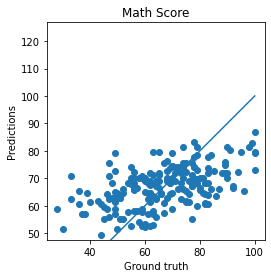

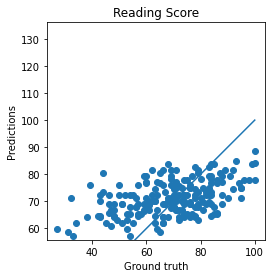

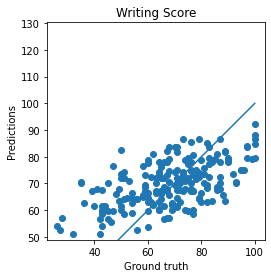

In [28]:
import matplotlib.pyplot as plt
import numpy as np
y_test = np.array(y_test)
y_pred = np.array(y_pred)
plot_pred(y_test[:,0], y_pred[:,0], title='Math Score')
plot_pred(y_test[:,1], y_pred[:,1], title='Reading Score')
plot_pred(y_test[:,2], y_pred[:,2], title ='Writing Score')

### Questions
1. What preprocessing techniques did you use? Why?

**Answer** :
****
    - *`Ordinal Encoding` for encoding non numerical data. `Ordinal Encoding`
        because the non numerical columns were categorical. (Although, also 
        tried one-hot encoding, but result is more or less the same)*
2. Describe the fine-tuning process and how you reached your model architecture.
**Answer :**
****
    - *`StandardScaler` was used to get all the data in the same range, but 
        even without it, the result was still the same, no better, no worse.*

    - *`Learning rate scheduler` was used to find the best learning rate, also
        tried `momentum` with `SGD()`. And `Adam()` was the other optimizer 
        tried to reach the model. Also tried:
        1. Changing `Epochs`
        2. Stacking layers
        3. Changing number of neurons
        
      to reach the architecture.

# Task 2: CNN (40%)
For this task, you will be doing image classification:
- First, adapt your best model from Task 1 to work on this task, and
fit it on the new data. Then, evaluate its performance.
- After that, build a CNN model for image classification.
- Compare both models in terms of accuracy, number of parameters and speed of
inference (the time the model takes to predict 50 samples).

For the given data, you need to do proper data preprocessing and augmentation,
data loaders.
Then fine-tune your model architecture (number of layers, number of filters,
activation function, learning rate, momentum, regularization).

### Data
You will be working with the data in `triple_mnist.zip` for predicting 3-digit
numbers writen in the image. Each image contains 3 digits similar to the
following example (whose label is `039`):

![example](https://github.com/shaohua0116/MultiDigitMNIST/blob/master/asset/examples/039/0_039.png?raw=true)

# Importing dependencies

In [80]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import re
import tensorflow as tf
from tensorflow import keras
import zipfile
import os
import random
import time

# Extracting files from zip

## **NOTE :** Please consider uploading train.zip, test.zip, and val.zip of the directories from the triple mnist folder extracted from triple_mnist.zip. 
## **The reason:** `NotImplementedError: compression type 9 (deflate64)` , although `7zip` can extract it using subprocess, but it only extracts the test directory inside it for some reason, hence, please consider this work around.

In [49]:
with zipfile.ZipFile("/content/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

with zipfile.ZipFile("/content/test.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

with zipfile.ZipFile("/content/val.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

## Getting the directories from the zips

In [50]:
trainpath = '/content/train'
testpath = '/content/test'
valpath = '/content/val'
train_dir = [name for name in os.listdir(trainpath) if os.path.isdir(os.path.join(trainpath, name))]
test_dir  = [name for name in os.listdir(testpath) if os.path.isdir(os.path.join(testpath, name))]
val_dir =  [name for name in os.listdir(valpath) if os.path.isdir(os.path.join(valpath, name))]
train_dir.sort() 
test_dir.sort()

## Getting name of the files for the lables

In [51]:
train_files_name = [name for name in os.listdir(trainpath)]
test_files_name = [name for name in os.listdir(testpath)]
val_files_name =  [name for name in os.listdir(valpath)]

## Path to train, test, and val extracted directories

In [52]:
TRAINDIR = "/content/train"
TESTDIR = "/content/test"
VALDIR = "/content/val"

# Preprocessing

## Function to extract digits one by one using contours and opencv

In [53]:
def each_digit(image):
      
      ret, thresh = cv2.threshold(image.copy(), 0, 255, cv2.THRESH_BINARY_INV)
           
      contours, _  = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      
      for c in contours:
       x,y,w,h = cv2.boundingRect(c)
       
       # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
       cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
       
       # Cropping out the digit from the image corresponding to the current contours in the for loop
       digit = thresh[y:y+h, x:x+w]
       
       # Resizing that digit to (28, 28)
       resized_digit = cv2.resize(digit, (28,28))
       
       # Adding the preprocessed digit to the list of preprocessed digits
       #preprocessed_digits.append(padded_digit)
       return resized_digit

## Function to get the preprocessed `training data` ready
### Labels are the name of the image directories (for each number in the image, label is the respective number position in the name of the directory)

In [54]:
# Empty list to store the training labels
label_y = []

def create_training_data():

    # Empty list to store each number image that is sent by each_digit function
    train_X = []

    # iterate over training directory 
    for image_dir in train_dir: 
        path = os.path.join(TRAINDIR,image_dir)  # path of directories

        # iterate over image directories in the training directory
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                # extract andn convert to array
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
                
                # splitting digits by spaces between them (dividing image into 3 parts)
                img_array1 = img_array[:, :img_array.shape[1]//3]
                img_array2 = img_array[:, img_array.shape[1]//3: img_array.shape[1]//3 + img_array.shape[1]//3]
                img_array3 = img_array[:, img_array.shape[1]//3 + img_array.shape[1]//3 :]
          
                # append the splitted images of each digit
                train_X.append(each_digit(img_array1))
                train_X.append(each_digit(img_array2))
                train_X.append(each_digit(img_array3))
  
                # append the relative positioned number from the name of the image directory
                label_y.append(str(image_dir)[0])
                label_y.append(str(image_dir)[1])
                label_y.append(str(image_dir)[2])

            # in the interest in keeping the output clean...
            except Exception as e:  
                pass 
    return train_X

## Function to get the preprocessed `validation data` ready

In [55]:
# Empty list to store the validation labels
val_y = []
def create_val_data():

    # Empty list to store each number image that is sent by each_digit function
    val_X = []

    # iterate over training directory 
    for image_dir in val_dir: 
        path = os.path.join(VALDIR,image_dir)  

        # iterate over image directories in the training directory
        for img in tqdm(os.listdir(path)):  
            try:
                # extract and convert to array
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 

                # splitting digits by spaces between them (dividing image into 3 parts)
                img_array1 = img_array[:, :img_array.shape[1]//3]
                img_array2 = img_array[:, img_array.shape[1]//3: img_array.shape[1]//3 + img_array.shape[1]//3]
                img_array3 = img_array[:, img_array.shape[1]//3 + img_array.shape[1]//3 :]

                # append the splitted images of each digit
                val_X.append(each_digit(img_array1))
                val_X.append(each_digit(img_array2))
                val_X.append(each_digit(img_array3))
                
                
                # append the relative positioned number from the name of the image directory
                val_y.append(str(image_dir)[0])
                val_y.append(str(image_dir)[1])
                val_y.append(str(image_dir)[2])
            
            # in the interest in keeping the output clean...
            except Exception as e:  
                pass 
    return val_X

## Function to get the preprocessed `test data` ready

In [56]:
# Empty list to store the test labels
test_y = []

def create_test_data():
  
    # Empty list to store each number image that is sent by each_digit function
    test_X = []
    
    
    # iterate over training directory 
    for image_dir in test_dir: 
        path = os.path.join(TESTDIR,image_dir)  

        # iterate over image directories in the training directory
        for img in tqdm(os.listdir(path)):  
            try:
                # extract convert to array 
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  
           
                # splitting digits by spaces between them (dividing image into 3 parts)
                img_array1 = img_array[:, :img_array.shape[1]//3]
                img_array2 = img_array[:, img_array.shape[1]//3: img_array.shape[1]//3 + img_array.shape[1]//3]
                img_array3 = img_array[:, img_array.shape[1]//3 + img_array.shape[1]//3 :]

                # append the splitted images of each digit
                test_X.append(each_digit(img_array1))
                test_X.append(each_digit(img_array2))
                test_X.append(each_digit(img_array3))

                # append the relative positioned number from the name of the image directory
                test_y.append(str(image_dir)[0])
                test_y.append(str(image_dir)[1])
                test_y.append(str(image_dir)[2])

            # in the interest in keeping the output clean...
            except Exception as e:  
                pass 
    return test_X

## Calling the function to get, `train, validate, and test data, and labels`

In [59]:
td_array = np.array(create_training_data())
val_array = np.array(create_val_data())
test_array = np.array(create_test_data())

100%|██████████| 100/100 [00:00<00:00, 1484.69it/s]


## Checking the shapes of the data

In [60]:
print(f"Training shape: {td_array.shape}")
print(f"Validation shape: {val_array.shape}")
print(f"Testing shape: {test_array.shape}")

Training shape: (192000, 28, 28)
Validation shape: (48000, 28, 28)
Testing shape: (60000, 28, 28)


## Checking the shapes of the labels

In [63]:
print(f"Training shape: {np.array(label_y).shape}")
print(f"Validation shape: {np.array(val_y).shape}")
print(f"Testing shape: {np.array(test_y).shape}")

Training shape: (192000,)
Validation shape: (48000,)
Testing shape: (60000,)


## Visualizing random image from training set

Label: 9


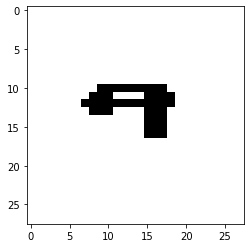

In [65]:
r = random.randint(0, len(td_array))
plt.imshow(td_array[r].reshape(28, 28), cmap = "gray")
print(f"Label: {label_y[r]}")

## Multilabel binarizer for the labels (Function)

In [66]:
from sklearn.preprocessing import MultiLabelBinarizer

def mlb(labels):# Fit the multi-label binarizer on the training set
  mlb = MultiLabelBinarizer()
  mlb.fit(labels)
  return mlb.transform(labels)

In [67]:
y_train = mlb(label_y)
y_test = mlb(test_y)
y_val = mlb(val_y)

In [68]:
print(f"Train labels : {y_train.shape}")
print(f"Validation labels : {y_val.shape}")
print(f"Test labels : {y_test.shape}")

Train labels : (192000, 10)
Validation labels : (48000, 10)
Test labels : (60000, 10)


## Reshaping train, test, and val data to feed into the network

In [69]:
X_train = np.array(td_array)
X_val = np.array(val_array)
X_test = np.array(test_array)

X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)
X_val = np.array(X_val).reshape(-1,28,28,1)

# Just finally checking the shapes of the data
print(f"Training shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (192000, 28, 28, 1)
Validation shape: (48000, 28, 28, 1)
Testing shape: (60000, 28, 28, 1)


# 1. Curating the previous model to fit for this one

## Model building

In [71]:
tf.random.set_seed(42)
 
 # Functional API
 
 # Input layer
input = tf.keras.Input(shape=(28,28,1))

flatten = tf.keras.layers.Flatten()
dense1 = tf.keras.layers.Dense(64, activation = "relu")
dense2 = tf.keras.layers.Dense(64, activation = "relu")

output = tf.keras.layers.Dense(10, activation = "softmax")

x = flatten(input)
x = dense1(x)
x = dense2(x)
outputs = output(x)

# model
model = tf.keras.Model(inputs = input, outputs = outputs, name = "1")

## Summary

In [72]:
model.summary()

Model: "1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Model plot

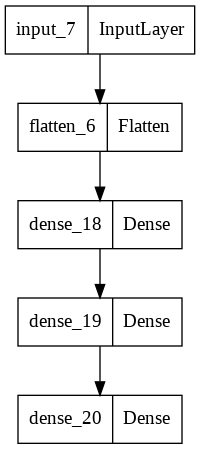

In [75]:
keras.utils.plot_model(model)

## Compilation

In [98]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.metrics.categorical_crossentropy,
             metrics = ['accuracy'])

## Fitting

In [99]:
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
3000/3000 [==============================] - 11s 4ms/step - loss: 2.3023 - accuracy: 0.1052 - val_loss: 2.3064 - val_accuracy: 0.0958
Epoch 2/10
3000/3000 [==============================] - 11s 4ms/step - loss: 2.3018 - accuracy: 0.1066 - val_loss: 2.3058 - val_accuracy: 0.0938
Epoch 3/10
3000/3000 [==============================] - 9s 3ms/step - loss: 2.3018 - accuracy: 0.1069 - val_loss: 2.3064 - val_accuracy: 0.0938
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 2.3018 - accuracy: 0.1063 - val_loss: 2.3053 - val_accuracy: 0.0938
Epoch 5/10
3000/3000 [==============================] - 10s 3ms/step - loss: 2.3018 - accuracy: 0.1070 - val_loss: 2.3051 - val_accuracy: 0.0958
Epoch 6/10
3000/3000 [==============================] - 10s 3ms/step - loss: 2.3019 - accuracy: 0.1068 - val_loss: 2.3066 - val_accuracy: 0.0958
Epoch 7/10
3000/3000 [==============================] - 9s 3ms/step - loss: 2.3018 - accuracy: 0.1058 - val_loss: 2.3051 - val_accur

## Evaluation on the test set


In [100]:
model.evaluate(X_test, y_test)

1875/1875 [==============================] - 5s 2ms/step - loss: 2.3073 - accuracy: 0.0833


[2.3072662353515625, 0.0833333358168602]

## Time to predict first 50 test samples

In [103]:
start = time.time()
y_pred_one = model.predict(X_test[:50][:][:])
end = time.time()
print(f"Time taken : {end-start}")

2/2 [==============================] - 0s 8ms/step
Time taken : 0.10498452186584473


## Observation:
- ### `Time taken :  0.1049` sec
- ###  `Accuracy : 8 %`
- ### `Total and Trainale Parameters : 55,050 ` (from the model summary)

## 2. CNN model

In [89]:
# random seed for reproducibility
tf.random.set_seed(42)

# number of unique labels
num_classes = 10

# input shape
input_shape = (28, 28, 1)

# CNN model using tensorflow's keras sequential api
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="leaky_relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
     
        # batch normalization
        keras.layers.BatchNormalization(),
     
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="leaky_relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
     
        # batch normalization
        keras.layers.BatchNormalization(),
     
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="leaky_relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
     
        # batch normalization
        keras.layers.BatchNormalization(),
     
        keras.layers.Dense(10, activation = "leaky_relu"),
     
        keras.layers.Flatten(),
     
        # drop out regularization
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

## Summary

In [90]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                      

## Model Plot

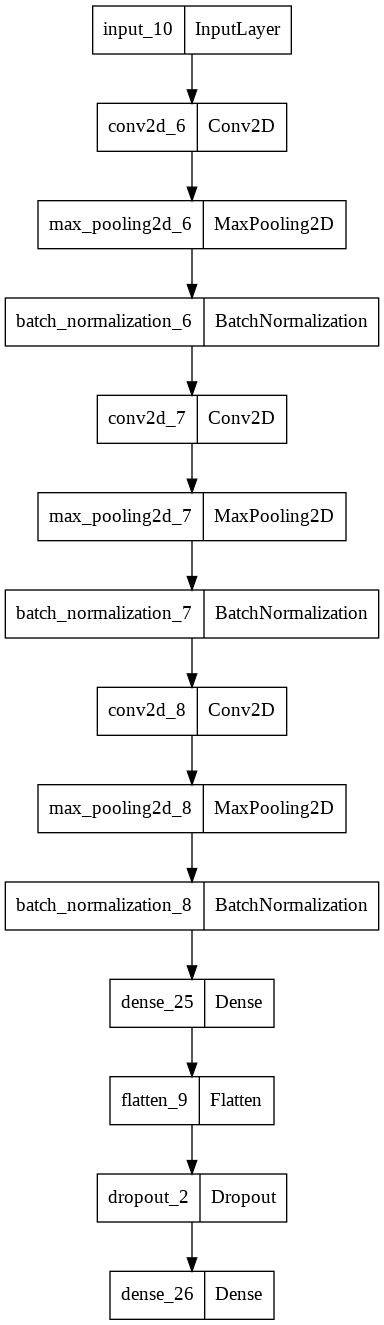

In [92]:
keras.utils.plot_model(model_cnn)

## Compilation

In [105]:
model_cnn.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.metrics.categorical_crossentropy,
             metrics = ['accuracy'])

## Fitting

In [106]:
history = model_cnn.fit(X_train, y_train, batch_size=64, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
3000/3000 [==============================] - 15s 5ms/step - loss: 0.7427 - accuracy: 0.7400 - val_loss: 0.4389 - val_accuracy: 0.8600
Epoch 2/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.7246 - accuracy: 0.7461 - val_loss: 0.4338 - val_accuracy: 0.8632
Epoch 3/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.7220 - accuracy: 0.7465 - val_loss: 0.4294 - val_accuracy: 0.8631
Epoch 4/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.7158 - accuracy: 0.7489 - val_loss: 0.4281 - val_accuracy: 0.8614
Epoch 5/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.7168 - accuracy: 0.7480 - val_loss: 0.4259 - val_accuracy: 0.8655
Epoch 6/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.7161 - accuracy: 0.7494 - val_loss: 0.4278 - val_accuracy: 0.8616
Epoch 7/10
3000/3000 [==============================] - 14s 5ms/step - loss: 0.7101 - accuracy: 0.7515 - val_loss: 0.4237 - val_ac

## Evaluation on the test set

In [107]:
model_cnn.evaluate(X_test, y_test)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4256 - accuracy: 0.8670


[0.42555588483810425, 0.8669999837875366]

## Predicting first 50 test samples and timing it

In [104]:
start = time.time()
y_pred_one = model_cnn.predict(X_test[:50][:][:])
end = time.time()
print(f"Time taken : {end-start}")

2/2 [==============================] - 0s 81ms/step
Time taken : 0.39960622787475586


## Observation:
- ### `Time taken :  0.3996` sec
- ###  `Accuracy : 86%`
- ### `Total and Trainale Parameters : 7800, 7672 respectively ` (from the model summary)

# Conclusion: CNN performs better overall with 86% accuracy on 10 epochs, that is 78% more than simple ANN

### Questions
1. What preprocessing techniques did you use? Why?
**Answer :**
****
    - I used splitting of the image also known as image slicing to get the 
      region of the interest, from there I used contour creation for bounding
      box to extract single images. I did because on making it multi-label
      classification, the model was not learning, hence I decided to classify 
      them individually

    - For labels I extracted the respective position of the digit in the image 
      directory name to get the label for the individual digit

2. What data augmentation techniques did you use?
**Answer:**
****
    There were enough data points already, but since I did image slicing it 
    increased the image dataset. No particular additional artifical data    
    augmentation was required.
3. Describe the fine-tuning process and how you reached your final CNN model.
**Answer:**
**** 
    I tried stacking multiple Convolutional layers, even LSTMS on the top of  
    them, but they were more or less producing similar results to my final cnn
    model that is in this notebook. I find it unecessary to complicate it, if 
    I can get good results with the simplest possible.

# Task 3: Decision Trees and Ensemble Learning (15%)

For the `loan_data.csv` data, predict if the bank should give a loan or not.
You need to do the following:
- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

# Importing data

In [108]:
df = pd.read_csv("/content/loan_data.csv")

## Looking the data

In [109]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Looking the target column and it's values

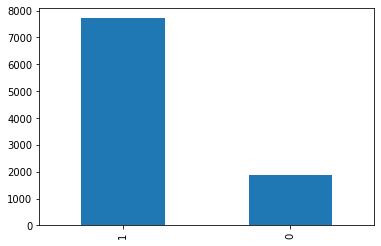

In [112]:
df["credit.policy"].value_counts().plot(kind = "bar")

## Non numerical column processing

In [113]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

df["purpose"] = enc.fit_transform(df[["purpose"]])

## Correlation matrix (with the target)

In [114]:
corr_matrix = df.corr()
corr_matrix["credit.policy"].sort_values(ascending=False)

credit.policy        1.000000
fico                 0.348319
days.with.cr.line    0.099026
installment          0.058770
log.annual.inc       0.034906
purpose              0.017569
pub.rec             -0.054243
delinq.2yrs         -0.076318
dti                 -0.090901
revol.util          -0.104095
not.fully.paid      -0.158119
revol.bal           -0.187518
int.rate            -0.294089
inq.last.6mths      -0.535511
Name: credit.policy, dtype: float64

## Splitting target from the data

In [115]:
y = df['credit.policy']
X = df.drop(['credit.policy'], axis=1)

## Scaling (standard scalar)

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

X = pipeline.fit_transform(X)

## Train test split

In [124]:
from sklearn.model_selection import train_test_split

# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# 1. Decision tree classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_clf = DecisionTreeClassifier(random_state=42)

decision_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluation function

In [126]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)  
    accuracy = accuracy_score(y_test, predictions)*100
    print('Model Performance') 
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

## GridSearchCV to find best parameters

In [127]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 9,10,12,14,16,18,20],
    'max_features': [None,'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8,1,2,3],
    'splitter': ['best', 'random']
}

decision_grid = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=42),
    param_grid=params,
    cv=5,
    n_jobs=5, 
)

decision_grid.fit(X_train, y_train)
print(decision_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'splitter': 'best'}


In [128]:
print("-------base_decision_clf------------") 
base_accuracy = evaluate(decision_clf, X_test, y_test)

print("-------best_grid_decision_clf--------")
best_grid = decision_grid.best_estimator_
random_accuracy = evaluate(best_grid, X_test, y_test)

-------base_decision_clf------------
Model Performance
Accuracy = 99.11%.
-------best_grid_decision_clf--------
Model Performance
Accuracy = 99.01%.


## Visualization

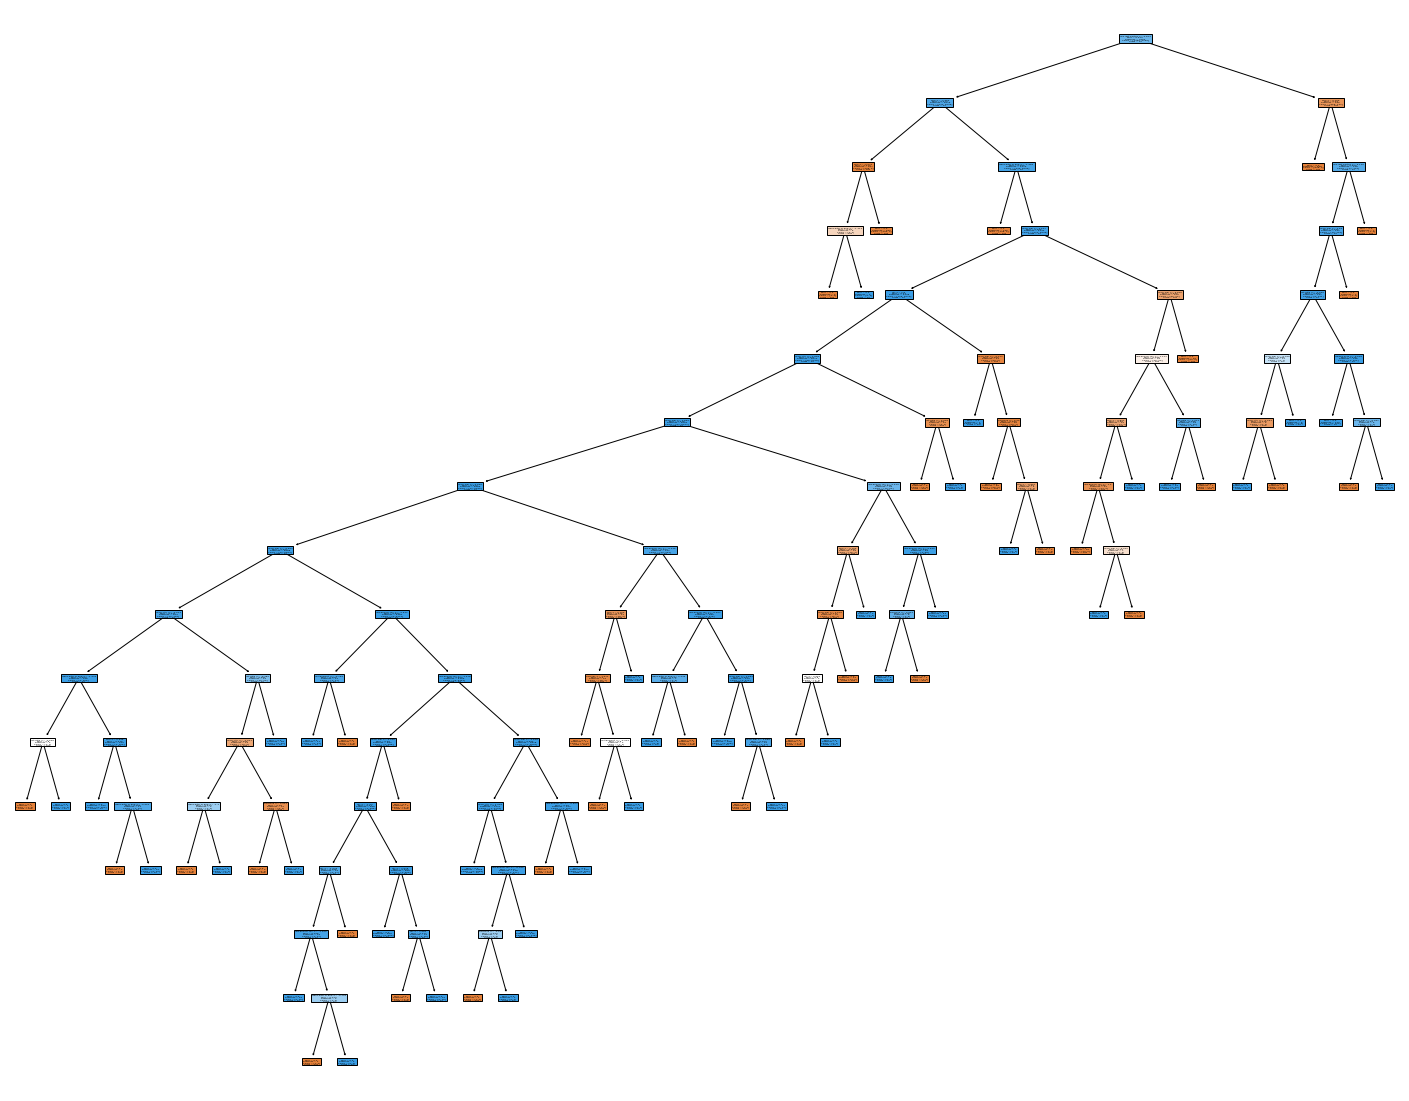

In [139]:
import matplotlib.pyplot as plt
from sklearn import tree

features = df.drop(['credit.policy'], axis=1)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_clf, 
                   feature_names=features.columns,  
                   class_names=['yes', 'no'],
                   filled=True)

# 2. Random Forest classifier

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rnd_clf = RandomForestClassifier(random_state=42)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## RandomSearchCV to find best parameters

In [140]:
from sklearn.model_selection import RandomizedSearchCV 
 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
criterion = ['entropy', 'gini']
max_features = ['log2', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)  

random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               }
 
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, cv = 3, verbose=2, random_state=42)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=800; total time=   7.5s
[CV] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=800; total time=   8.5s
[CV] END criterion=entropy, max_depth=40, max_features=sqrt, n_estimators=800; total time=   7.3s
[CV] END criterion=gini, max_depth=90, max_features=sqrt, n_estimators=1000; total time=   7.6s
[CV] END criterion=gini, max_depth=90, max_features=sqrt, n_estimators=1000; total time=   8.7s
[CV] END criterion=gini, max_depth=90, max_features=sqrt, n_estimators=1000; total time=   8.4s
[CV] END criterion=gini, max_depth=80, max_features=sqrt, n_estimators=1000; total time=   7.7s
[CV] END criterion=gini, max_depth=80, max_features=sqrt, n_estimators=1000; total time=   7.7s
[CV] END criterion=gini, max_depth=80, max_features=sqrt, n_estimators=1000; total time=   7.6s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimator

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [141]:
rf_random.best_params_
print("---------base_random_clf----------") 
base_accuracy = evaluate(rnd_clf, X_test, y_test)

print("---------best_random_clf----------")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

---------base_random_clf----------
Model Performance
Accuracy = 98.75%.
---------best_random_clf----------
Model Performance
Accuracy = 98.59%.


## Visualization

[Text(0.7397290209790209, 0.9736842105263158, 'inq.last.6mths <= 0.874\nentropy = 0.705\nsamples = 4840\nvalue = [1469, 6193]\nclass = no'),
 Text(0.5983391608391608, 0.9210526315789473, 'days.with.cr.line <= -1.382\nentropy = 0.446\nsamples = 4232\nvalue = [623, 6083]\nclass = no'),
 Text(0.5843531468531469, 0.868421052631579, 'entropy = 0.0\nsamples = 113\nvalue = [179, 0]\nclass = yes'),
 Text(0.6123251748251748, 0.868421052631579, 'dti <= 1.8\nentropy = 0.359\nsamples = 4119\nvalue = [444, 6083]\nclass = no'),
 Text(0.5983391608391608, 0.8157894736842105, 'fico <= -1.352\nentropy = 0.309\nsamples = 4066\nvalue = [357, 6083]\nclass = no'),
 Text(0.5843531468531469, 0.7631578947368421, 'entropy = 0.0\nsamples = 143\nvalue = [223, 0]\nclass = yes'),
 Text(0.6123251748251748, 0.7631578947368421, 'revol.bal <= 1.681\nentropy = 0.15\nsamples = 3923\nvalue = [134, 6083]\nclass = no'),
 Text(0.40646853146853146, 0.7105263157894737, 'fico <= 0.491\nentropy = 0.06\nsamples = 3817\nvalue = [4

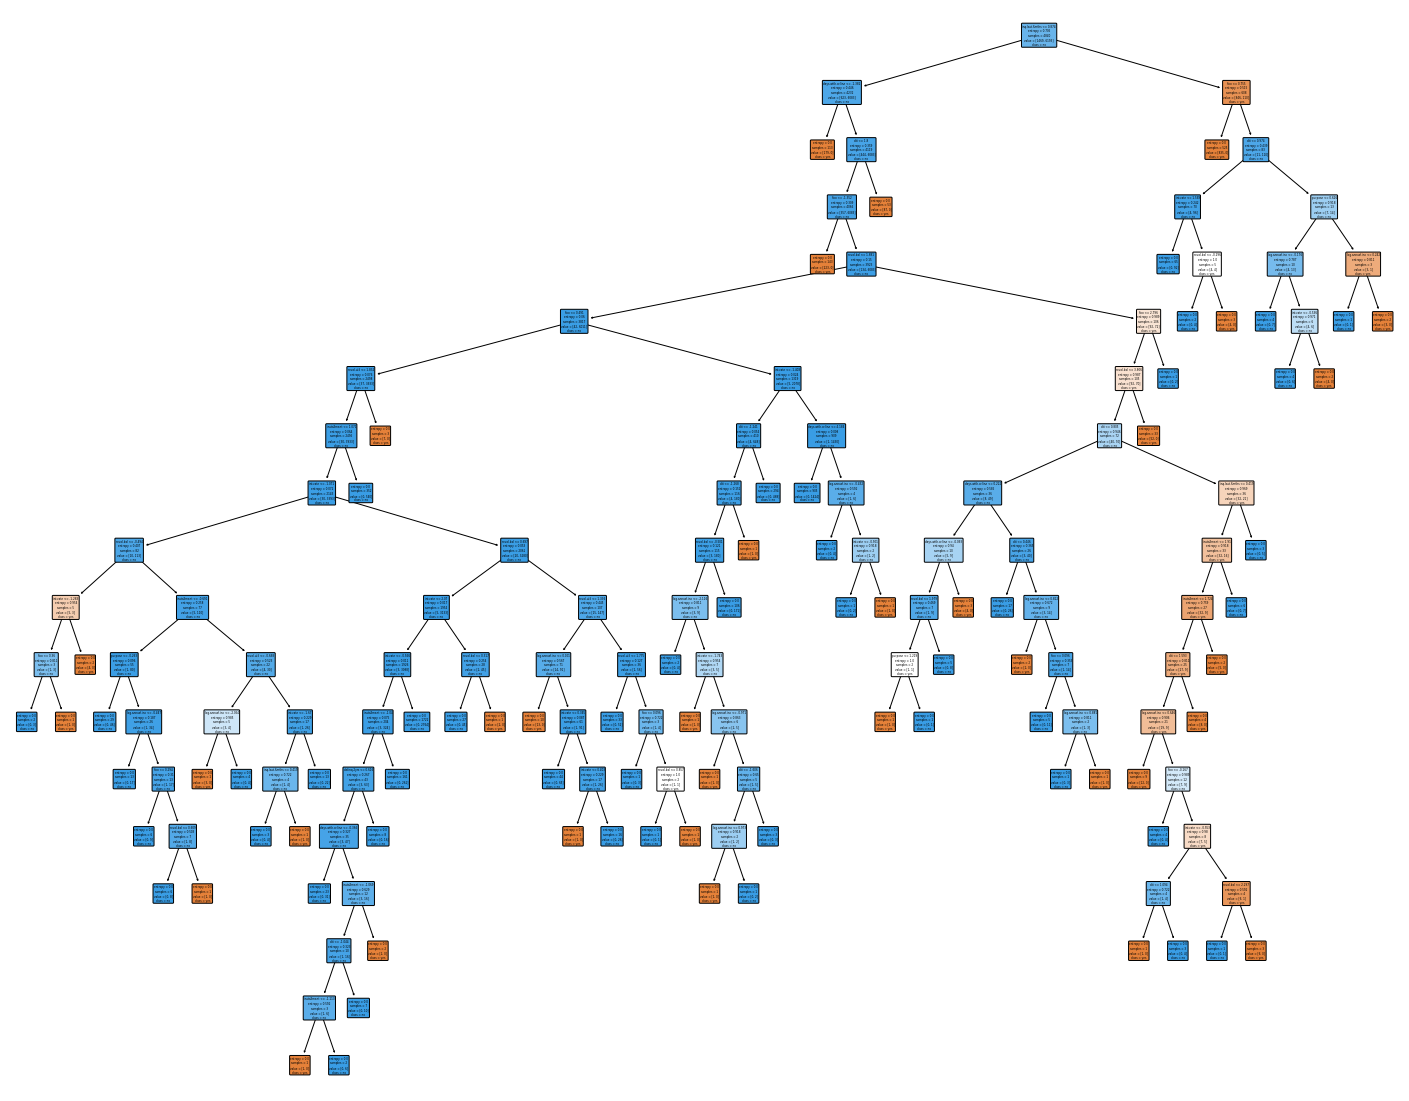

In [147]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

features = df.drop(['credit.policy'], axis=1)
fig = plt.figure(figsize=(25,20))
plot_tree(best_random.estimators_[0], 
          feature_names=features.columns,  
          class_names=['yes', 'no'],
          filled=True, impurity=True, 
          rounded=True)

### Questions
1. How did the DT compare to the RF in performance? Why?
**Answer :**
****
    DT performed a little better. It gave 99.11% accuracy while RF gave 98.75%. 
    One can say both are performing good. But since RF does not search for the
    best prediction, instead, it makes multiple random predictions, this might 
    be reason in a little yest varying result.
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
**Answer :**
****
    I used GridSearch and RandomSearch CV for that. Max-depth for decision tree 
    found to be 9, as can be seen. However, we can even see by the plot for the 
    best Random forest estimator that it's depth is deeper.
3. What is ensemble learning? What are its pros and cons?
**Answer :**
****
    To solve a specific computational intelligence problem, multiple models, 
    such as classifiers or experts, are strategically generated and combined in 
    an ensemble learning process. The main goal of ensemble learning is to 
    increase the (classification, prediction, function approximation, etc.)

    Pros:
    There are two primary, linked reasons to choose an ensemble over a single 
    model: 
    1. Performance: Compared to a single contributing model, an ensemble can 
    anticipate events more accurately and perform better overall.
    2. Robustness: An ensemble narrows the prediction and model performance 
    distribution.

    Moreover:
    1. Ensemble approaches outperform individual models in terms of predicted  
    accuracy.

    2. When a dataset contains both linear and non-linear types of data, 
    ensemble approaches are highly helpful; several models can be coupled to 
    manage this type of data.

    3. With ensemble approaches, bias and variance can be decreased, and the 
    model is typically neither underfitted nor overfitted.

    4. A model ensemble is always more stable and less noisy.

    Cons:
    1. The output of an ensembled model is difficult to forecast and   
    understand, making ensemble modeling less interpretable. As a result, it is 
    challenging to market the ensemble concept and obtain insightful commercial 
    data.

    2. Assembling is a difficult skill to master, and any poor decision might 
    result in a model with lower prediction accuracy than an individual model.

    3. Costs associated with assembly include both time and physical space. 
    Therefore, ensembling can boost ROI.

4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
**Answer :**
****
    Bagging : A parallel ensemble learning technique called bagging or 
    bootstrapping is used to lower the variance in the final prediction.

    Types:
    1. Bagging Meta- Estimator: 
    It is a meta-estimator that can be used with 
    the BaggingClassifier and BaggingRegressor tools from the Scikit Learning 
    Library to make predictions in classification and regression tasks. The 
    steps in this procedure are as follows: Bagging or Bootstrapping is the 
    process of generating random subsets from the original data collection. The 
    subsets of the data set contain all of the features. Each of the small sets 
    is fitted using an appropriate base estimator. Predictions from each 
    modality will be combined to get the final outcome.

    2. Random Forest:
    In the category of bagging methods, it is the most widely used approach. 
    Both classification and regression issues are addressed by it. It only 
    takes a mix of decisions to identify and locate the data point, improper 
    class, in a random forest. It chooses a collection of features, and only 
    those can determine the best split at each decision-making node. As to how 
    it operates: Some random subsets are produced from the original dataset, 
    much like a bagging meta- estimator. At each node in the decision tree, the 
    best split is determined solely based on a random collection of features. 
    The decision tree model is fitted to each subgroup. The average of all 
    forecasts made by all decision trees serves as the final prediction. As a 
    result, rather of focusing on one model, both strategies aim to reduce 
    variance and enhance the prediction model's overall performance.
****

    Boosting : Boosting is a sequential ensemble learning technique to convert 
    weak base learners to strong learner that performs better and is less bias. 
    The intuition here is that individual models may not perform very well on 
    the entire dataset, but they work well on some part of the entire dataset. 
    Hence each model in the ensemble actually boosts the overall performance.

    Three different boosting algorithms exist, and they are as follows:

    1. AdaBoost (Adaptive Boosting) method
    2. Gradient Boosting 
    3. XG Boost

    1. AdaBoost: AdaBoost works best when used to improve decision tree 
    performance in binary classification situations.
    
    - The invention of the technique, AdaBoost, was first referred to as 
    AdaBoost. M1 by Freund and Schapire. Due to the fact that it is utilized
    for classification as opposed to regression, it has more recently been
    referred to as discrete AdaBoost.

    - Any machine learning algorithm's performance can be improved with 
    AdaBoost. When teaching weak learners, it works best. These are models whose
    categorization accuracy is slightly better than random chance.

    - Decision trees with one level are the algorithm that works best with 
    AdaBoost and is consequently used the most frequently. They are frequently
    referred to as decision stumps since these trees are so brief and only
    contain one categorization decision.

    2. Gradient Boosting : One of the most well-liked machine learning 
    techniques for tabular datasets is gradient boosting. It has excellent 
    usability, can deal with missing values, outliers, and large cardinality 
    categorical values on your features, and is strong enough to detect any 
    nonlinear relationship between your model target and features. Even though 
    you don't need to know the specifics of the algorithm to build basic 
    gradient boosting trees with some well-known libraries like XGBoost or 
    LightGBM, you still need to understand it when you start adjusting 
    hyper-parameters, creating unique loss functions, etc. to improve the 
    quality of your model.

# Task 4: Domain Gap (15%)

Evaluate your CNN model from task 2 on SVHN data without retraining your model.

# Extracting from the ZIP

In [149]:
with zipfile.ZipFile("/content/svhn.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

## Path

In [152]:
svhnpath = '/content/svhn'
svhn_dir = [name for name in os.listdir(svhnpath) if os.path.isdir(os.path.join(svhnpath, name))]
svhn_dir.sort()

## Getting the data and the label

In [188]:
# Empty list to store each number image that is sent by each_digit function
svhn_X = []
svhn_y = []

# iterate over svhn directory 
for filename in os.listdir(svhnpath):
        try:
            # extract and convert to array
            img_array = cv2.imread(os.path.join(svhnpath,filename), cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array,(28, 28))

            # splitting digits by spaces between them (dividing image into 3 parts)
            img_array1 = img_array[:, :img_array.shape[1]//3]
            img_array2 = img_array[:, img_array.shape[1]//3: img_array.shape[1]//3 + img_array.shape[1]//3]
            img_array3 = img_array[:, img_array.shape[1]//3 + img_array.shape[1]//3 :]

            img_array1 = cv2.resize(img_array1, (28, 28))
            img_array2 = cv2.resize(img_array2, (28, 28))
            img_array3 = cv2.resize(img_array3, (28, 28))

            svhn_X.append(img_array1)
            svhn_X.append(img_array1)
            svhn_X.append(img_array1)
                                   
            # append the splitted images of each digit
            #svhn_X.append(each_digit(img_array1))
            #svhn_X.append(each_digit(img_array2))
            #svhn_X.append(each_digit(img_array3))
            
            
            # append the relative positioned number from the name of the image directory
            svhn_y.append(str(filename)[0])
            svhn_y.append(str(filename)[1])
            svhn_y.append(str(filename)[2])
        
        # in the interest in keeping the output clean...
        except Exception as e:  
            pass 

# Getting data to right shape for the network input

In [192]:
X = np.array(np.array(svhn_X)).reshape(-1,28,28,1)
print(f"X shape : {np.array(X).shape}")

X shape : (276, 28, 28, 1)


## Calling the multilabel binarizer to encode the labels

In [193]:
y = mlb(svhn_y)
print(f"y shape : {y.shape}")

y shape : (276, 10)


## Evaluating on this data, on the model_cnn model build above

In [195]:
model_cnn.evaluate(X, y)

9/9 [==============================] - 0s 17ms/step - loss: 3.6119 - accuracy: 0.1051


[3.611891508102417, 0.10507246106863022]

### Questions
1. How did your model perform? Why is it better/worse?
**Answer :**
****
    It performed worse. It is obvious because both the images(domain) comes  
    from different distributions, that is to say that the data used to train 
    the model is separable from this svhn set, hence, it does not perform good. 
    An Adversial validation technique can be used to recognize this. The 
    pictures in the svhn dataset are of not just different fonts, sizes, or 
    number of digits, but also some digits might be in a digitized format.
    Since, the model was trained on three digit handwritten data, it is not
    naturally supposed to be generalized.
2. What is domain gap in the context of ML?
**Answer :**
****
    All the values that can—i.e., that make sense given the context—go into a  
    function are referred to as a domain (in mathematics and machine learning). 
    A chore is (generally) a piece of work that needs to be completed or 
    undergone (e.g. figuring out the function). The dissimilarity in the 
    domains of datasets is domain gap that comes from the distinct 
    distributions between the two domains.
3. Suggest two ways through which the problem of domain gap can be tackled.
**Answer :**
****

    1. A family of techniques uses an adversarial loss at various levels to 
    address the domain adaptation problem.
      1. Adversarial loss at pixel level
      2. Adversarial loss at feature level
      3. Adversarial loss at output level

    2. Learning with the Sliced Wasserstein Discrepancy:
    The task-specific classifiers C1 and C2, which get input from feature 
    generator G, differ in their use of the probability measures p1 and p2 in 
    Rd. This difference is captured by the SWD. Through a variational 
    formulation of the Wasserstein metric using radial projections on the 
    uniform measures on the unit sphere Sd-1, the SWD enables end-to-end 
    training directly and provides a geometrically meaningful guide to detect 
    target samples that are far from the support of the source.